In [23]:
import sys
import pandas as pd
import numpy as np
import glob

In [24]:
files = sorted(glob.glob('../../data/*.nc'))
len(files)

62

In [25]:
import xarray as xr

In [26]:
ds = xr.open_mfdataset(files)
ds

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 89, time: 744)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float32 2.0 1.75 1.5 1.25 ... -19.5 -19.75 -20.0
  * time       (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2021-12-01
Data variables:
    z          (time, latitude, longitude) float32 dask.array<chunksize=(12, 89, 81), meta=np.ndarray>
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(12, 89, 81), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(12, 89, 81), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(12, 89, 81), meta=np.ndarray>
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(12, 89, 81), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-10-25 16:04:52 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [27]:
ds = ds.groupby('time.season').mean('time')
ds

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 89, season: 4)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float32 2.0 1.75 1.5 1.25 ... -19.5 -19.75 -20.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    z          (season, latitude, longitude) float32 dask.array<chunksize=(1, 89, 81), meta=np.ndarray>
    u10        (season, latitude, longitude) float32 dask.array<chunksize=(1, 89, 81), meta=np.ndarray>
    v10        (season, latitude, longitude) float32 dask.array<chunksize=(1, 89, 81), meta=np.ndarray>
    t2m        (season, latitude, longitude) float32 dask.array<chunksize=(1, 89, 81), meta=np.ndarray>
    tp         (season, latitude, longitude) float32 dask.array<chunksize=(1, 89, 81), meta=np.ndarray>

In [28]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from cartopy import feature as cf

import geocat.viz as gv

In [29]:
ds['t2m']

<xarray.DataArray 't2m' (season: 4, latitude: 89, longitude: 81)>
dask.array<concatenate, shape=(4, 89, 81), dtype=float32, chunksize=(1, 89, 81), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float32 2.0 1.75 1.5 1.25 ... -19.5 -19.75 -20.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [36]:
DEF = ds['t2m'][0]-273.16
MAM = ds['t2m'][2]-273.16
JJA = ds['t2m'][1]-273.16
SON = ds['t2m'][3]-273.16

UDEF = ds['u10'][0]
VDEF = ds['v10'][0]

UMAM = ds['u10'][2]
VMAM = ds['v10'][2]

UJJA = ds['u10'][1]
VJJA = ds['v10'][1]

USON = ds['u10'][3]
VSON = ds['v10'][3]

lat = ds['latitude']
lon = ds['longitude']
lon, lat = np.meshgrid(lon, lat)

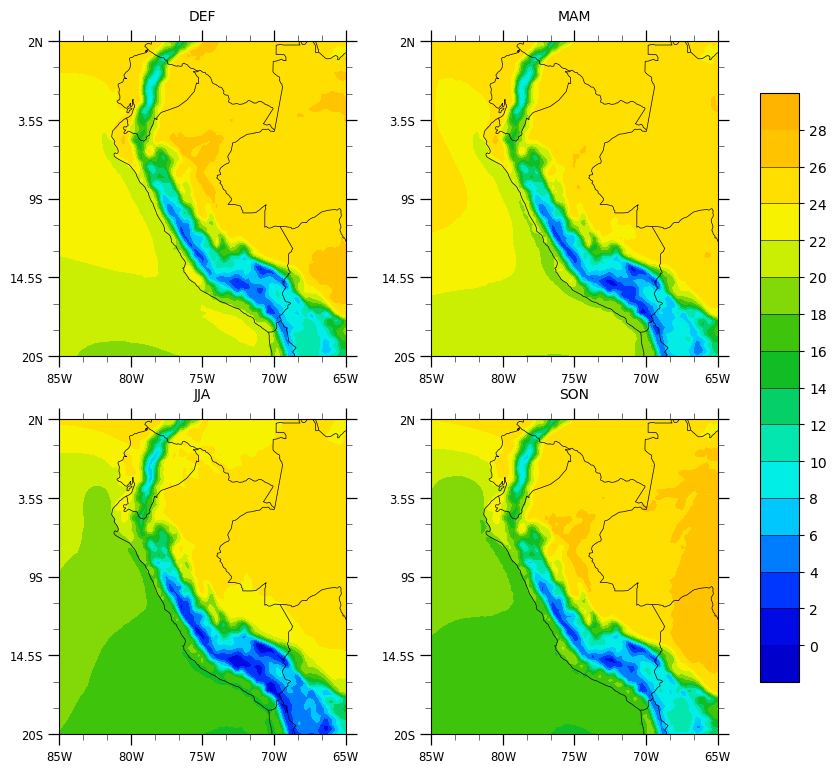

In [38]:
fig = plt.figure(figsize=(11, 9))

grid = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

# Choose the map projection
proj = ccrs.PlateCarree()

# Add the subplots
ax1 = fig.add_subplot(grid[0, 0], projection=proj)  # 
ax2 = fig.add_subplot(grid[0, 1], projection=proj)  # 
ax3 = fig.add_subplot(grid[1, 0], projection=proj)  # 
ax4 = fig.add_subplot(grid[1, 1], projection=proj)  # 

for (ax, title) in [(ax1, 'DEF'), (ax2, 'MAM'), (ax3, 'JJA'), (ax4, 'SON')]:
    # Use geocat.viz.util convenience function to set axes tick values
    gv.set_axes_limits_and_ticks(ax=ax,
                                 xlim=(lon.min(), lon.max()),
                                 ylim=(lat.min(), lat.max()),
                                 xticks=np.linspace(lon.min(), lon.max(), 5),
                                 yticks=np.linspace(lat.min(), lat.max(), 5))

    # Use geocat.viz.util convenience function to make plots look like NCL
    # plots by using latitude, longitude tick labels
    gv.add_lat_lon_ticklabels(ax)

    # Remove the degree symbol from tick labels
    ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
    ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

    # Use geocat.viz.util convenience function to add minor and major ticks
    gv.add_major_minor_ticks(ax)

    # Draw coastlines
    ax.add_feature(cf.BORDERS, edgecolor='k', linewidth=0.5)
    ax.coastlines(linewidth=0.5, edgecolor='k')

    # Add center title
    ax.set_title(title, loc='center', y=1.04, fontsize=10)

# Select an appropriate colormap
#cmap = 'magma'
import cmaps
# Importando la base del colormap para trabajar
cmap = gv.truncate_colormap(cmaps.BkBlAqGrYeOrReViWh200,
                            minval=0.1,
                            maxval=0.6,
                            n=len(np.arange(0, 30, 2)))
C = ax1.contourf(lon,
                 lat,
                 DEF.values,
                 levels=np.arange(0, 30, 2),
                 cmap=cmap,
                 extend='both')

ax2.contourf(lon,
             lat,
             MAM.values,
             levels=np.arange(0, 30, 2),
             cmap=cmap,
             extend='both')

ax3.contourf(lon,
             lat,
             JJA.values,
             levels=np.arange(0, 30, 2),
             cmap=cmap,
             extend='both')

ax4.contourf(lon,
             lat,
             SON.values,
             levels=np.arange(0, 30, 2),
             cmap=cmap,
             extend='both')

# Add colorbars
# By specifying two axes for `ax` the colorbar will span both of them
plt.colorbar(C,
             ax=[ax1, ax2, ax3, ax4],
             ticks=range(0, 30, 2),
             extendrect=True,
             extendfrac='auto',
             shrink=0.85,
             aspect=15,
             drawedges=True)

fig.savefig('fig/Temp_estacional.png', dpi = 200, facecolor='w', bbox_inches = 'tight', 
            pad_inches = 0.1)

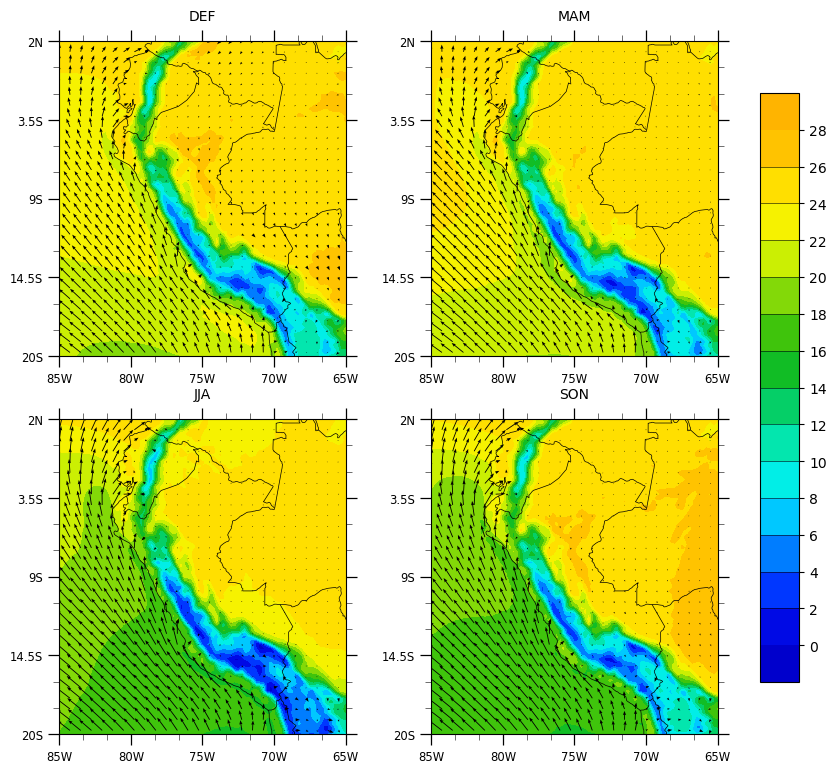

In [39]:
fig = plt.figure(figsize=(11, 9))

grid = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

# Choose the map projection
proj = ccrs.PlateCarree()

# Add the subplots
ax1 = fig.add_subplot(grid[0, 0], projection=proj)  # 
ax2 = fig.add_subplot(grid[0, 1], projection=proj)  # 
ax3 = fig.add_subplot(grid[1, 0], projection=proj)  # 
ax4 = fig.add_subplot(grid[1, 1], projection=proj)  # 

for (ax, title) in [(ax1, 'DEF'), (ax2, 'MAM'), (ax3, 'JJA'), (ax4, 'SON')]:
    # Use geocat.viz.util convenience function to set axes tick values
    gv.set_axes_limits_and_ticks(ax=ax,
                                 xlim=(lon.min(), lon.max()),
                                 ylim=(lat.min(), lat.max()),
                                 xticks=np.linspace(lon.min(), lon.max(), 5),
                                 yticks=np.linspace(lat.min(), lat.max(), 5))

    # Use geocat.viz.util convenience function to make plots look like NCL
    # plots by using latitude, longitude tick labels
    gv.add_lat_lon_ticklabels(ax)

    # Remove the degree symbol from tick labels
    ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
    ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

    # Use geocat.viz.util convenience function to add minor and major ticks
    gv.add_major_minor_ticks(ax)

    # Draw coastlines
    ax.add_feature(cf.BORDERS, edgecolor='k', linewidth=0.5)
    ax.coastlines(linewidth=0.5, edgecolor='k')

    # Add center title
    ax.set_title(title, loc='center', y=1.04, fontsize=10)

# Select an appropriate colormap
#cmap = 'magma'
import cmaps
# Importando la base del colormap para trabajar
cmap = gv.truncate_colormap(cmaps.BkBlAqGrYeOrReViWh200,
                            minval=0.1,
                            maxval=0.6,
                            n=len(np.arange(0, 30, 2)))
C = ax1.contourf(lon,
                 lat,
                 DEF.values,
                 levels=np.arange(0, 30, 2),
                 cmap=cmap,
                 extend='both')

ax1.quiver(lon[::3,::3],
            lat[::3,::3],
            UDEF[::3,::3],
            VDEF[::3,::3],
            color='black',
            width=.003,
            scale=120.,
            headwidth=3.75,
            zorder=4)

ax2.contourf(lon,
             lat,
             MAM.values,
             levels=np.arange(0, 30, 2),
             cmap=cmap,
             extend='both')

ax2.quiver(lon[::3,::3],
            lat[::3,::3],
            UMAM[::3,::3],
            VMAM[::3,::3],
            color='black',
            width=.003,
            scale=120.,
            headwidth=3.75,
            zorder=4)

ax3.contourf(lon,
             lat,
             JJA.values,
             levels=np.arange(0, 30, 2),
             cmap=cmap,
             extend='both')

ax3.quiver(lon[::3,::3],
            lat[::3,::3],
            UJJA[::3,::3],
            VJJA[::3,::3],
            color='black',
            width=.003,
            scale=120.,
            headwidth=3.75,
            zorder=4)

ax4.contourf(lon,
             lat,
             SON.values,
             levels=np.arange(0, 30, 2),
             cmap=cmap,
             extend='both')

ax4.quiver(lon[::3,::3],
            lat[::3,::3],
            USON[::3,::3],
            VSON[::3,::3],
            color='black',
            width=.003,
            scale=120.,
            headwidth=3.75,
            zorder=4)

# Add colorbars
# By specifying two axes for `ax` the colorbar will span both of them
plt.colorbar(C,
             ax=[ax1, ax2, ax3, ax4],
             ticks=range(0, 30, 2),
             extendrect=True,
             extendfrac='auto',
             shrink=0.85,
             aspect=15,
             drawedges=True)

fig.savefig('fig/Temp_UV_estacional.png', dpi = 200, facecolor='w', bbox_inches = 'tight', 
            pad_inches = 0.1)

In [40]:
df = ds.mean(('latitude', 'longitude')).to_dataframe()
df['t2m'] = df['t2m'] - 273.16
df

,z,u10,v10,t2m,tp
season,,,,,
DJF,6090.311523,-0.870993,1.268281,21.731812,0.005430
JJA,6090.311523,-1.093933,2.077786,19.498901,0.002650
MAM,6090.311523,-1.187092,1.595383,21.499603,0.005039
SON,6090.311523,-0.921135,1.851881,20.195862,0.003632
